In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# matplotlib.pyplot.rc('text', usetex=True)
# matplotlib.pyplot.rcParams.update({
#     'text.usetex' : True
# })

In [3]:
def rademacher(size):
    """
    Generate Rademacher random variables.

    Args:
    size (int): Number of random variables to generate.

    Returns:
    numpy.ndarray: An array of Rademacher random variables.
    """
    return 2 * np.random.randint(0, 2, size) - 1

def sample_subgaussian_vector(dim, subgaussian_type="gaussian"):
    """
    Sample a sub-Gaussian random vector.

    Args:
    dim (int): Dimension of the vector.
    subgaussian_type (str): Type of sub-Gaussian distribution ("gaussian" or "rademacher").

    Returns:
    numpy.ndarray: A sub-Gaussian random vector of dimension `dim`.
    """

    if subgaussian_type == "gaussian":
        vec = np.random.randn(dim)
    elif subgaussian_type == "rademacher":
        vec = rademacher(dim)
    elif subgaussian_type == "uniform":
        vec = np.random.uniform(low=-1, high=1, size=dim)
    elif subgaussian_type == "bernoulli":
        mu = np.random.random()
        vec = np.random.binomial(n=1, p=mu, size=dim).astype(np.float64)
        vec -= mu
    
    return vec.reshape(-1, 1)

In [4]:
d = 5   # the number of features
eta = sample_subgaussian_vector(d, subgaussian_type="uniform")

T = 100 # the horizon
start = np.identity(d)
max_eigs = np.zeros(T+1)
min_eigs = np.zeros(T+1)
for t in range(T+1):
    eig_max = np.linalg.eigvals(start).max()
    eig_min = np.linalg.eigvals(start).min()
    max_eigs[t] = eig_max
    min_eigs[t] = eig_min
    start += (eta @ eta.T)
    
print(min_eigs)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


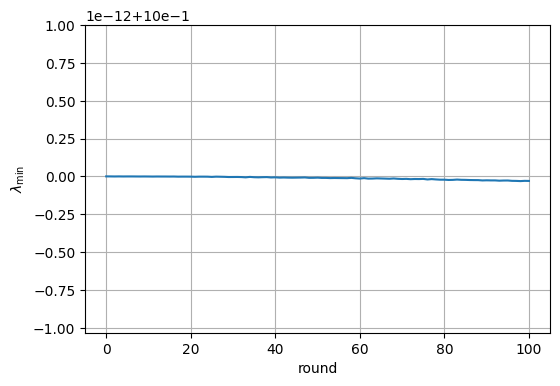

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(min_eigs)
plt.grid(True)
plt.xlabel('round')
plt.ylabel('$\lambda_{\min}}$')
plt.show()

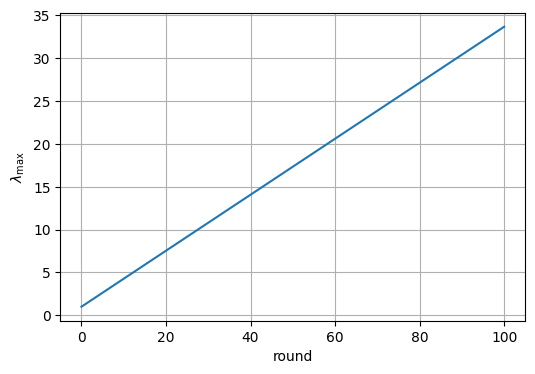

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(max_eigs)
plt.grid(True)
plt.xlabel('round')
plt.ylabel('$\lambda_{\max}}$')
plt.show()

In [7]:
d, k = 10, 5   # the number of features

T = 10  # the horizon
lam = 5
lammins = np.zeros(T+1)
lammaxs = np.zeros(T+1)
start = np.zeros(d*d).reshape(d, -1)
save = []
for t in range(T+1):
    save.append(start.copy())
    eigvals = np.linalg.eigvals(start)
    lammin, lammax = eigvals.min(), eigvals.max()
    lammins[t] = lammin
    lammaxs[t] = lammax
    X = sample_subgaussian_vector(d*d, subgaussian_type="gaussian").reshape(d, -1)
    start += X.T @ X

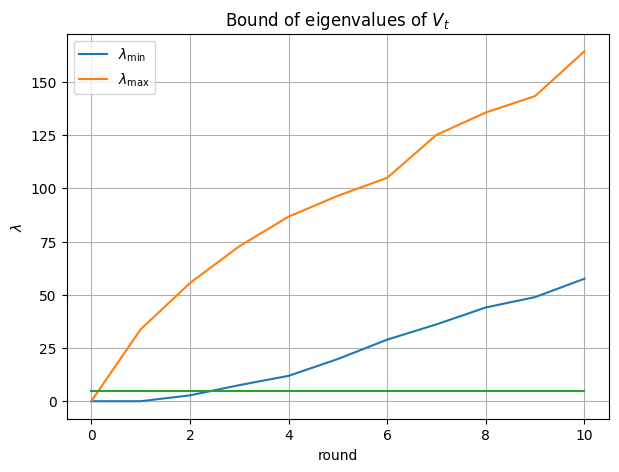

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(lammins, label='${\lambda_{\min}}$')
plt.plot(lammaxs, label='${\lambda_{\max}}$')
plt.plot([lam for _ in range(T+1)])
plt.grid(True)
plt.xlabel('round')
plt.ylabel('$\lambda$')
plt.legend()
plt.title("Bound of eigenvalues of ${V}_t$")
plt.show()

In [9]:
inv_lammins = np.zeros(T+1)
inv_lammaxs = np.zeros(T+1)
start = lam * np.identity(d)
for t in range(T+1):
    eigvals = np.linalg.eigvals(np.linalg.inv(save[t]))
    inv_lammin, inv_lammax = eigvals.min(), eigvals.max()
    inv_lammins[t] = (inv_lammin)
    inv_lammaxs[t] = (inv_lammax)
    X = sample_subgaussian_vector(d*d, subgaussian_type="gaussian").reshape(d, -1)
    start += X.T @ X

LinAlgError: Singular matrix

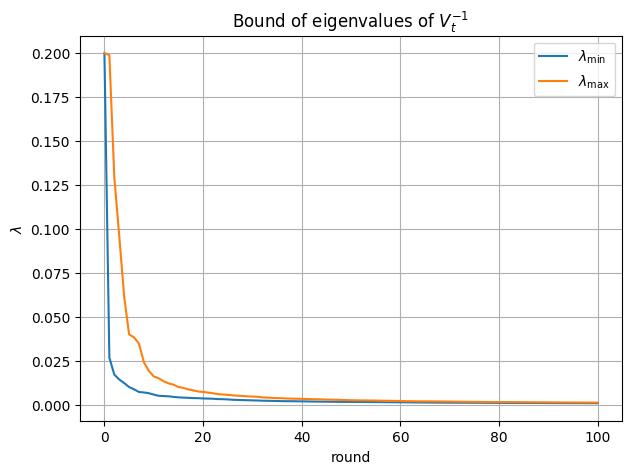

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(inv_lammins, label='${\lambda_{\min}}$')
plt.plot(inv_lammaxs, label='${\lambda_{\max}}$')
plt.grid(True)
plt.xlabel('round')
plt.ylabel('$\lambda$')
plt.legend()
plt.title("Bound of eigenvalues of ${V}_t^{-1}$")
plt.show()

In [11]:
def frobenius(matrix:np.ndarray) -> float:
    m, n = matrix.shape
    norm = 0
    for i in range(m):
        for j in range(n):
            norm += (matrix[i][j] ** 2)
            
    return np.sqrt(norm)

In [12]:
K = 2.
m, n = 5, 5
A = np.random.randint(-4, 5, size=m*n).reshape(m, -1).astype('float')

print(A)
print(K)
print(np.max(A))

[[-2. -2.  3.  4. -1.]
 [-2.  4.  3.  0.  2.]
 [ 4. -4.  4.  4. -4.]
 [ 3. -1. -3. -3. -2.]
 [ 2.  4. -2. -2.  4.]]
2.0
4.0


In [13]:
abs(A)

array([[2., 2., 3., 4., 1.],
       [2., 4., 3., 0., 2.],
       [4., 4., 4., 4., 4.],
       [3., 1., 3., 3., 2.],
       [2., 4., 2., 2., 4.]])

In [14]:
A *= 1/np.max(abs(A))

In [15]:
frobenius(A)

3.7332961307670196

In [16]:
np.sqrt(m*n)

5.0

In [17]:
T = 100
frobs = np.zeros(T)
upper_bound = np.zeros(T)

for t in range(T):
    A = np.random.uniform(low=-100, high=100, size=m*n).reshape(m, n)
    k = 1 / np.max(abs(A))
    A *= k
    norm = frobenius(A)
    bound = np.sqrt(m*n)*1
    print(f"Norm: {norm:.6f}\tBound: {bound:.6f}")
    
    frobs[t] = norm
    upper_bound[t] = bound
    
print(frobs)
print(upper_bound)

Norm: 2.607021	Bound: 5.000000
Norm: 2.756884	Bound: 5.000000
Norm: 2.994679	Bound: 5.000000
Norm: 3.191224	Bound: 5.000000
Norm: 3.206191	Bound: 5.000000
Norm: 2.973364	Bound: 5.000000
Norm: 2.829213	Bound: 5.000000
Norm: 3.140520	Bound: 5.000000
Norm: 3.047326	Bound: 5.000000
Norm: 2.781471	Bound: 5.000000
Norm: 3.091181	Bound: 5.000000
Norm: 3.394037	Bound: 5.000000
Norm: 2.729814	Bound: 5.000000
Norm: 2.695698	Bound: 5.000000
Norm: 3.382672	Bound: 5.000000
Norm: 2.959006	Bound: 5.000000
Norm: 3.222606	Bound: 5.000000
Norm: 2.962118	Bound: 5.000000
Norm: 2.946089	Bound: 5.000000
Norm: 2.823227	Bound: 5.000000
Norm: 3.404390	Bound: 5.000000
Norm: 3.252573	Bound: 5.000000
Norm: 2.787311	Bound: 5.000000
Norm: 2.892250	Bound: 5.000000
Norm: 2.201545	Bound: 5.000000
Norm: 3.005201	Bound: 5.000000
Norm: 3.036723	Bound: 5.000000
Norm: 2.987646	Bound: 5.000000
Norm: 2.840590	Bound: 5.000000
Norm: 2.707757	Bound: 5.000000
Norm: 3.434493	Bound: 5.000000
Norm: 2.697555	Bound: 5.000000
Norm: 2.

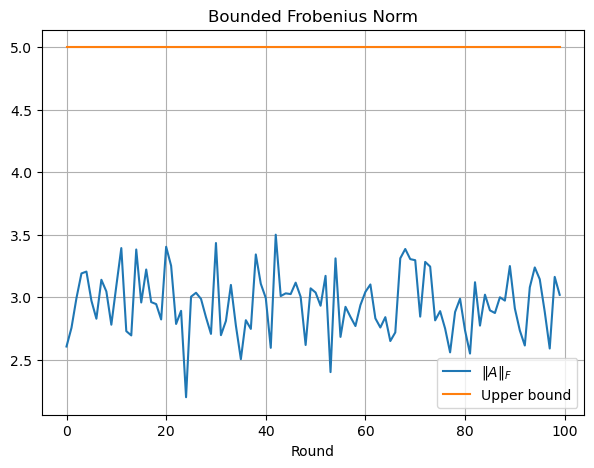

In [18]:
plt.figure(figsize=(7, 5))
plt.plot(frobs, label='${\Vert A \Vert}_F$')
plt.plot(upper_bound, label='Upper bound')
plt.grid(True)
plt.xlabel('Round')
plt.legend()
plt.title("Bounded Frobenius Norm")
plt.show()

In [19]:
T = 100
frobs = np.zeros(T)
upper_bound = np.zeros(T)

for t in range(T):
    A = np.random.uniform(low=-100, high=100, size=m*n).reshape(m, n)
    k = 1 / np.max(abs(A))
    A *= k
    norm = frobenius(A.T @ A)
#     bound = np.sqrt(m*n)*1
    print(f"Norm: {norm:.6f}")
    
    frobs[t] = norm
#     upper_bound[t] = bound
    
# print(frobs)
# print(upper_bound)

Norm: 7.049552
Norm: 4.022034
Norm: 6.149592
Norm: 6.265137
Norm: 5.684084
Norm: 5.368656
Norm: 6.400566
Norm: 4.698244
Norm: 4.549859
Norm: 3.546239
Norm: 5.402463
Norm: 4.753004
Norm: 5.550801
Norm: 5.330965
Norm: 5.285708
Norm: 4.796329
Norm: 5.482627
Norm: 7.266872
Norm: 7.530808
Norm: 5.958182
Norm: 6.160965
Norm: 6.227653
Norm: 6.401922
Norm: 4.930671
Norm: 7.166722
Norm: 4.836489
Norm: 4.768585
Norm: 6.212938
Norm: 4.985749
Norm: 3.124276
Norm: 6.705541
Norm: 6.492578
Norm: 6.470785
Norm: 7.320779
Norm: 6.008402
Norm: 7.107199
Norm: 5.924499
Norm: 4.569932
Norm: 5.164833
Norm: 4.844898
Norm: 5.657619
Norm: 5.220478
Norm: 3.936220
Norm: 5.431078
Norm: 5.906042
Norm: 4.657081
Norm: 4.597053
Norm: 4.783061
Norm: 5.266107
Norm: 6.739024
Norm: 5.771170
Norm: 5.265374
Norm: 5.100138
Norm: 6.228757
Norm: 6.481446
Norm: 5.347059
Norm: 5.941713
Norm: 5.704730
Norm: 5.382222
Norm: 6.707770
Norm: 5.007614
Norm: 5.736037
Norm: 5.022970
Norm: 6.099568
Norm: 5.932709
Norm: 5.244554
Norm: 5.50

In [20]:
def frobenius(matrix:np.ndarray) -> float:
    is_matrix = True
    if len(matrix.shape) == 1:
        is_matrix = False
    
    if is_matrix:
        m, n = matrix.shape
        norm = 0
        for i in range(m):
            for j in range(n):
                norm += (matrix[i][j] ** 2)
    else:
        norm = np.sum(matrix ** 2)
            
    return np.sqrt(norm)

def l2norm(array:np.ndarray) -> float:
    is_matrix = True
    if len(array.shape) == 1:
        is_matrix = False
    
    if is_matrix:
        max_singular = np.max(np.linalg.svd(array, compute_uv=False))
        return max_singular
    return np.sqrt(np.sum(array ** 2))

def is_symmetric(array:np.ndarray) -> bool:
    return (array == array.T).all()

In [21]:
d = 5
K = 2
T = 100

norms = np.zeros(T+1)
v = np.random.normal(0, 1, size=d).reshape(-1, 1).T
v = v * (K/l2norm(v))
norms[1] = frobenius(v)
for t in range(2, T+1):
    new_v = np.random.normal(4, 4, size=d)
    new_v *= (K / l2norm(new_v))
    v = np.concatenate((v, new_v.reshape(-1, 1).T), axis=0)
    norm = frobenius(v)
    print(norm)
    norms[t] = norm

2.8284271247461903
3.4641016151377544
4.0
4.47213595499958
4.898979485566356
5.291502622129181
5.656854249492381
6.0
6.324555320336759
6.6332495807108005
6.92820323027551
7.211102550927979
7.4833147735478835
7.745966692414835
8.0
8.246211251235321
8.485281374238571
8.71779788708135
8.944271909999161
9.165151389911683
9.380831519646861
9.591663046625442
9.797958971132715
10.000000000000002
10.198039027185573
10.392304845413268
10.583005244258365
10.770329614269011
10.954451150103326
11.135528725660047
11.313708498984765
11.48912529307606
11.661903789690605
11.832159566199234
12.000000000000002
12.165525060596442
12.328828005937956
12.4899959967968
12.649110640673522
12.8062484748657
12.961481396815723
13.114877048604004
13.266499161421601
13.41640786499874
13.564659966250538
13.71130920080209
13.85640646055102
14.000000000000002
14.142135623730951
14.2828568570857
14.422205101855958
14.560219778561038
14.69693845669907
14.832396974191328
14.966629547095767
15.0996688705415
15.2315462117

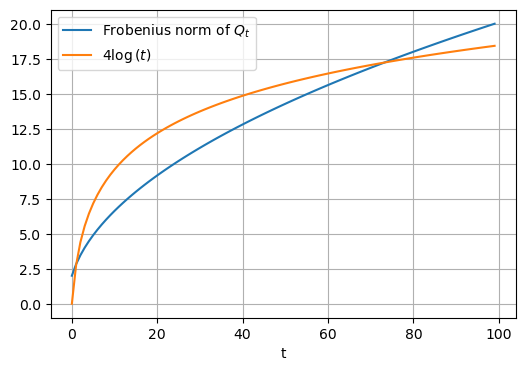

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(norms[1:], label="Frobenius norm of $Q_t$")
plt.plot(4*np.log(np.arange(1, T+1)), label="$ 4\log{(t)} $")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
v = np.random.normal(0, 1, size=d).reshape(-1, 1).T
v = v * (K/l2norm(v))
print(v.shape)
norms[1] = frobenius(v)
for t in range(2, T+1):
    new_v = np.random.normal(4, 4, size=d)
    new_v *= (K / l2norm(new_v))
    v = np.concatenate((v, new_v.reshape(-1, 1).T), axis=0)
    print(v.shape)

(1, 5)
(2, 5)
(3, 5)
(4, 5)
(5, 5)
(6, 5)
(7, 5)
(8, 5)
(9, 5)
(10, 5)
(11, 5)
(12, 5)
(13, 5)
(14, 5)
(15, 5)
(16, 5)
(17, 5)
(18, 5)
(19, 5)
(20, 5)
(21, 5)
(22, 5)
(23, 5)
(24, 5)
(25, 5)
(26, 5)
(27, 5)
(28, 5)
(29, 5)
(30, 5)
(31, 5)
(32, 5)
(33, 5)
(34, 5)
(35, 5)
(36, 5)
(37, 5)
(38, 5)
(39, 5)
(40, 5)
(41, 5)
(42, 5)
(43, 5)
(44, 5)
(45, 5)
(46, 5)
(47, 5)
(48, 5)
(49, 5)
(50, 5)
(51, 5)
(52, 5)
(53, 5)
(54, 5)
(55, 5)
(56, 5)
(57, 5)
(58, 5)
(59, 5)
(60, 5)
(61, 5)
(62, 5)
(63, 5)
(64, 5)
(65, 5)
(66, 5)
(67, 5)
(68, 5)
(69, 5)
(70, 5)
(71, 5)
(72, 5)
(73, 5)
(74, 5)
(75, 5)
(76, 5)
(77, 5)
(78, 5)
(79, 5)
(80, 5)
(81, 5)
(82, 5)
(83, 5)
(84, 5)
(85, 5)
(86, 5)
(87, 5)
(88, 5)
(89, 5)
(90, 5)
(91, 5)
(92, 5)
(93, 5)
(94, 5)
(95, 5)
(96, 5)
(97, 5)
(98, 5)
(99, 5)
(100, 5)


In [24]:
v = np.random.normal(0, 1, size=d).reshape(-1, 1).T
v = v * (K/l2norm(v))
gram = v.T @ v
print(f"{1}\t{gram.shape}\tis symmetric? {is_symmetric(gram)}")
norms[1] = frobenius(gram)
for t in range(2, T+1):
    new_v = np.random.normal(4, 4, size=d)
    new_v *= (K / l2norm(new_v))
    v = np.concatenate((v, new_v.reshape(-1, 1).T), axis=0)
    gram = v.T @ v
    norms[t] = frobenius(gram)
    print(f"{t}\t{gram.shape}\tis symmetric? {is_symmetric(gram)}")

1	(5, 5)	is symmetric? True
2	(5, 5)	is symmetric? True
3	(5, 5)	is symmetric? True
4	(5, 5)	is symmetric? True
5	(5, 5)	is symmetric? True
6	(5, 5)	is symmetric? True
7	(5, 5)	is symmetric? True
8	(5, 5)	is symmetric? True
9	(5, 5)	is symmetric? True
10	(5, 5)	is symmetric? True
11	(5, 5)	is symmetric? True
12	(5, 5)	is symmetric? True
13	(5, 5)	is symmetric? True
14	(5, 5)	is symmetric? True
15	(5, 5)	is symmetric? True
16	(5, 5)	is symmetric? True
17	(5, 5)	is symmetric? True
18	(5, 5)	is symmetric? True
19	(5, 5)	is symmetric? True
20	(5, 5)	is symmetric? True
21	(5, 5)	is symmetric? True
22	(5, 5)	is symmetric? True
23	(5, 5)	is symmetric? True
24	(5, 5)	is symmetric? True
25	(5, 5)	is symmetric? True
26	(5, 5)	is symmetric? True
27	(5, 5)	is symmetric? True
28	(5, 5)	is symmetric? True
29	(5, 5)	is symmetric? True
30	(5, 5)	is symmetric? True
31	(5, 5)	is symmetric? True
32	(5, 5)	is symmetric? True
33	(5, 5)	is symmetric? True
34	(5, 5)	is symmetric? True
35	(5, 5)	is symmetric?

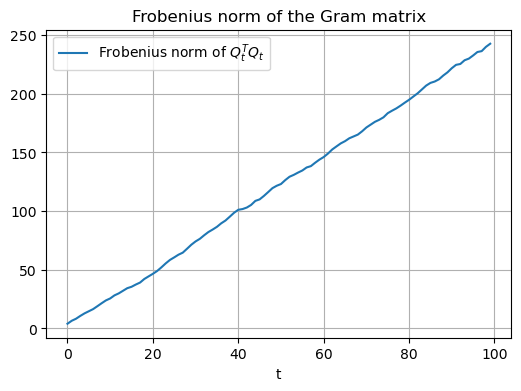

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(norms[1:], label="Frobenius norm of $Q_t^{T} Q_t$")
# plt.plot(4*np.log(np.arange(1, T+1)), label="$ 4\log{(t)} $")
plt.xlabel("t")
plt.legend()
plt.title("Frobenius norm of the Gram matrix")
plt.grid(True)
plt.show()

In [13]:
d = 5
K = 2
T = 100

norms = np.zeros(T)
v = sample_subgaussian_vector(dim=d, subgaussian_type="gaussian")
vbar = v @ v.T
print(vbar)
print(np.linalg.eigvals(vbar))
# norms[0] = 

# norms[1] = frobenius(v)
# for t in range(2, T+1):
#     new_v = np.random.normal(4, 4, size=d)
#     new_v *= (K / l2norm(new_v))
#     v = np.concatenate((v, new_v.reshape(-1, 1).T), axis=0)
#     norm = frobenius(v)
#     print(norm)
#     norms[t] = norm

[[ 0.00224095  0.00347224  0.02684028 -0.04314963  0.05432418]
 [ 0.00347224  0.00538006  0.04158764 -0.06685814  0.08417254]
 [ 0.02684028  0.04158764  0.32147093 -0.51681101  0.6506507 ]
 [-0.04314963 -0.06685814 -0.51681101  0.83084842 -1.04601508]
 [ 0.05432418  0.08417254  0.6506507  -1.04601508  1.31690391]]
[ 0.00000000e+00  2.47684427e+00  3.23342103e-17  4.18295986e-17
 -7.32829342e-17]


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(norms[1:], label="Frobenius norm of $Q_t$")
plt.plot(4*np.log(np.arange(1, T+1)), label="$ 4\log{(t)} $")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.show()